<div class="alert block alert-info alert">

# <center> Scientific Programming in Python
## <center>Karl N. Kirschner<br>Bonn-Rhein-Sieg University of Applied Sciences<br>Sankt Augustin, Germany

# <center> Pandas
#### <center> (Reading in, manipulating, analyzing and visualizing datasets.)</center>

<br><br>

"...providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for practical, real-world data analysis in Python." -- http://pandas.pydata.org/pandas-docs/stable/

- Tabular data with heterogeneously-typed columns (e.g., **CSV**, SQL, LibreOffice Calc, MS **Excel**)
- Ordered and unordered time series data.
- Arbitrary matrix data with row and column labels


**Significant things to note**:
- Allows you to **operate in any direction on your data** (i.e., by rows or by columns)
    - Database experts will find this interesting
        - SQL: manipulate data by rows (i.e., **row-focused**)
        - Columnar databases: manipulate data by columns (i.e., **column-focused**)
    - Operate data on data using 1-2 lines of code


- Data structures
    - **Series** - 1-dimensional data
    - **DataFrame** - 2 dimensional data


- **Index data**
    - can organize your data quickly and logically (e.g., based on calendar dates
    - can handle missing data


- **Missing data**
    - NaN
    - mean
    - fill forward and backward

#### Basic Functionalities to Know

1. Basics: https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html
1. Head and tail: (https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#head-and-tail)
1. Attributes and underlying data (relevant for the numpy lecture): (https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#attributes-and-underlying-data)
1. Descriptive statistics: (https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#descriptive-statistics)
1. Reindexing and altering labels: (https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#reindexing-and-altering-labels)
1. Iteration: (https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#iteration)
1. Sorting: (https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#sorting)
1. Copying: (https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#copying)
1. dtypes: (https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#dtypes)

#### Underlying libraries (dependencies used but not clearly seen)
1. Numpy
2. Matplotlib

<br>
    
#### Note about citations (i.e. referencing):

**For citing Pandas**: (via https://pandas.pydata.org/about/citing.html - modify for your Pandas version)

**Bibtex**

@software{reback2020pandas,  
    author       = {The pandas development team},  
    title        = {pandas-dev/pandas: Pandas},  
    month        = feb,  
    year         = 2020,  
    publisher    = {Zenodo},  
    version      = {latest},  
    doi          = {10.5281/zenodo.3509134},  
    url          = {https://doi.org/10.5281/zenodo.3509134}  
}

@InProceedings{mckinney-proc-scipy-2010,  
  author    = {{W}es {M}c{K}inney},  
  title     = {{D}ata {S}tructures for {S}tatistical {C}omputing in {P}ython},  
  booktitle = {{P}roceedings of the 9th {P}ython in {S}cience {C}onference},  
  pages     = {56 - 61},  
  year      = {2010},  
  editor    = {{S}t\'efan van der {W}alt and {J}arrod {M}illman},  
  doi       = {10.25080/Majora-92bf1922-00a}  
}

<br>
    
#### Sources
1. The pandas development team, pandas-dev/pandas: Pandas, Zenodo, 2020, https://doi.org/10.5281/zenodo.3509134, visited on May 15, 2023

2. McKinney, W., 2010, June. Data structures for statistical computing in python. In Proceedings of the 9th Python in Science Conference, van der Walt, S. & Millman, J. (Eds.), vol. 445 pp. 51-56).

3. Pandas contributors, https://pandas.pydata.org. Online; accessed on May 15, 2023.

4. Wes McKinney, Python for Data Analysis; Data Wrangling with Pandas, Numpy and Ipython, O'Reilly, Second Edition, 2018.

## <center><font color='dodgerblue'>Top Python Libraries in the Field of Computational Chemistry (as of 2023)</font><br>(# of projects from 176 surveyed)</center>
<br>

<div> <img src="00_images/top_compchem_libraries.png" width="1000"/> </div>

In [1]:
## For extra information given within the lectures

from IPython.display import HTML


def set_code_background(color: str):
    ''' Set the background color for code cells.

        Source: psychemedia via https://stackoverflow.com/questions/49429585/
                how-to-change-the-background-color-of-a-single-cell-in-a-jupyter-notebook-jupy

        To match Jupyter's dev class colors:
            "alert alert-block alert-warning" = #fcf8e3

        Args:
            color: HTML color, rgba, hex
    '''

    script = ("var cell = this.closest('.code_cell');"
              "var editor = cell.querySelector('.input_area');"
              f"editor.style.background='{color}';"
              "this.parentNode.removeChild(this)")
    display(HTML(f'<img src onerror="{script}">'))


set_code_background(color='#fcf8e3')

In [2]:
set_code_background(color='#fcf8e3')
print('Test for background color.')

Test for background color.


<hr style="border:2px solid gray"></hr>

In [3]:
import pandas as pd

## Pandas Series

A series contains two components:
1. a **one-dimensional array-like object** that contains a sequence of data values, and
2. an associated array of **data labels** (i.e., an **'index'** that start at zero )

#### Creating
Create a series that contains 5 integers, with index values from 0-4, using `Series`:

In [4]:
series_data = pd.Series([5, 10, 15, 20, 25], index=None)
series_data

0     5
1    10
2    15
3    20
4    25
dtype: int64

Intead, let manually assign the index values:

In [5]:
series_data = pd.Series([5, 10, 15, 20, 25], index=['d', 'e', 'a', 'simulation 1', 'simulation 2'])
series_data

d                5
e               10
a               15
simulation 1    20
simulation 2    25
dtype: int64

We can alter these indexes at any time using `index`.

In [6]:
series_data.index = ['Norway', 'Italy', 'Germany', 'simulation 1', 'simulation 2']
series_data

Norway           5
Italy           10
Germany         15
simulation 1    20
simulation 2    25
dtype: int64

#### Accessing the series

Access only the values, using `values`:

In [7]:
series_data.values

array([ 5, 10, 15, 20, 25])

Access only the index, using `index`:

In [8]:
series_data.index

Index(['Norway', 'Italy', 'Germany', 'simulation 1', 'simulation 2'], dtype='object')

Access the data via an index label (i.e., **human readable**):

In [9]:
series_data['simulation 1']

20

Or by a position:

In [10]:
series_data[3]

20

#### Using operators

In [11]:
series_data**2

Norway           25
Italy           100
Germany         225
simulation 1    400
simulation 2    625
dtype: int64

What happens when one of the series has **missing data**?

Let's create an alternate series that has the **Italian data missing**, and then **add them** to the original series:

In [12]:
series_data_missing = pd.Series([5, 10, 20, 25], index=['Germany', 'Norway', 'simulation 1', 'simulation 2'])
series_data_missing

Germany          5
Norway          10
simulation 1    20
simulation 2    25
dtype: int64

In [13]:
series_data_missing + series_data

Germany         20.0
Italy            NaN
Norway          15.0
simulation 1    40.0
simulation 2    50.0
dtype: float64

<font color='dodgerblue'>Notice</font>:
1. The values are **correctly summed together** even though the two **lists sequences are different** (see the **Germany** values)
    - ['Norway', 'Italy', **'Germany'**, 'simulation 1', 'simulation 2']  versus
    - [**'Germany'**, 'Norway', 'simulation 1', 'simulation 2']


2. The **missing index** results in a **`NaN`**

Converting a Pandas series to a regular list:
- use `tolist()`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.tolist.html

In [14]:
series_data.tolist()

[5, 10, 15, 20, 25]

<div class="alert alert-block alert-warning">
<hr style="border:1.5px dashed gray"></hr>

## Extra Information
### dtype
- https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes

Pandas will default to `int64` and `float64` dtypes for numbers.

However, notice that `series_data` and `series_data_missing` were `int64`, while `series_data + series_data_missing` resulted in `float64`. This is due to Pandas' built-in **upcasting**:
    
    "Types can potentially be upcasted when combined with other types, meaning they are promoted from
    the current type (e.g., int to float)."
    
`NaN` can not included in an `int64`, but only in `float64` (which is a Numpy limitation, I believe).
<hr style="border:1.5px dashed gray"></hr>

#### Filtering and Sorting

Filter the data, using a comparison operator (a boolean expresssion: `series_data >= 15`):

In [15]:
series_data >= 15

Norway          False
Italy           False
Germany          True
simulation 1     True
simulation 2     True
dtype: bool

To return a filtered series:

In [16]:
series_data[series_data >= 15]

Germany         15
simulation 1    20
simulation 2    25
dtype: int64

Sorting a series by its index, using `sort_index()`:

In [17]:
series_data.sort_index()

Germany         15
Italy           10
Norway           5
simulation 1    20
simulation 2    25
dtype: int64

<font color='dodgerblue'>Notice</font> the sorting goes by:
1. Capital case letters (i.e. German, Italy, Norway), and then by
1. Lower case letters (i.e. simulation 1, simulation 2)

Sorting a series by data values, using `sort_values()`:

In [18]:
series_data.sort_values()

Norway           5
Italy           10
Germany         15
simulation 1    20
simulation 2    25
dtype: int64

<hr style="border:2px solid gray"></hr>

## DataFrames
- DataFrames represent a **rectangular, ordered** table of data (numbers, strings, etc.)

- Conceptually like a spreadsheet

Let's create a simple user function that allows us to <font color='dodgerblue'>reset our example dataframe</font> as needed
1. First create a dictionary
2. Convert the **dictionary** to a **dataframe**

In [19]:
def dict2dataframe():
    '''Create a dataframe 'by hand' using a dictionary that has equal lengths.'''

    data_dict = {'group': ['Deichkind', 'Die Fantastischen Vier', 'Seeed', 'Paul van Dyk'],
                 'year': [2015, 2106, 2017, 2018],
                 'attendence (x1000)': [50, 60, 70, 90]}

    dataframe = pd.DataFrame(data_dict, index=['band 1', 'band 2', 'band 3', 'band 4'])

    return dataframe

In [20]:
dict2dataframe()

,group,year,attendence (x1000)
band 1,Deichkind,2015,50
band 2,Die Fantastischen Vier,2106,60
band 3,Seeed,2017,70
band 4,Paul van Dyk,2018,90


In [21]:
example_df = dict2dataframe()
example_df

,group,year,attendence (x1000)
band 1,Deichkind,2015,50
band 2,Die Fantastischen Vier,2106,60
band 3,Seeed,2017,70
band 4,Paul van Dyk,2018,90


**Alter the indexes** as done for series, using `index`. <font color='dodgerblue'>Notice</font> that index values do not need to be unique for each row, but this can cause problems (for example, when rows are deleted based on the index label).

Assign `band 1` to the first two index positions

In [22]:
example_df.index = ['band 1', 'band 1', 'band 3', 'band 4']
example_df

,group,year,attendence (x1000)
band 1,Deichkind,2015,50
band 1,Die Fantastischen Vier,2106,60
band 3,Seeed,2017,70
band 4,Paul van Dyk,2018,90


**Alter the header names** using Pandas' `rename`.
- Done using a dictionary (key: value)
    - key = old name
    - value = new name

In [23]:
example_df.rename({'attendence (x1000)': 'attendence'}, axis='columns', inplace=True)
example_df

,group,year,attendence
band 1,Deichkind,2015,50
band 1,Die Fantastischen Vier,2106,60
band 3,Seeed,2017,70
band 4,Paul van Dyk,2018,90


#### Inserting columns

Insert a column with specified values:

In [24]:
example_df['quality'] = ['good', 'excellent', 'good', 'average']
example_df

,group,year,attendence,quality
band 1,Deichkind,2015,50,good
band 1,Die Fantastischen Vier,2106,60,excellent
band 3,Seeed,2017,70,good
band 4,Paul van Dyk,2018,90,average


Insert a column and fill it with `NaN`:

In [25]:
example_df['number of total concerts'] = pd.Series(data='NaN')
example_df

,group,year,attendence,quality,number of total concerts
band 1,Deichkind,2015,50,good,NaN
band 1,Die Fantastischen Vier,2106,60,excellent,NaN
band 3,Seeed,2017,70,good,NaN
band 4,Paul van Dyk,2018,90,average,NaN


List the column lables using `columns`:

In [26]:
example_df.columns

Index(['group', 'year', 'attendence', 'quality', 'number of total concerts'], dtype='object')

List the column lables using `index`:

In [27]:
example_df.index

Index(['band 1', 'band 1', 'band 3', 'band 4'], dtype='object')

**Inserting rows**:

1. Create a Pandas Series

2. use `to_frame()` to convert a series to dataframe: https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.to_frame.html?highlight=to_frame#pandas.DatetimeIndex.to_frame

3. Use `transpose()` to transpose (think about like a matrix operation) the dataframe: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transpose.html?highlight=transpose#pandas.DataFrame.transpose

4. Use `concat()` (concatenate) to combine them: https://pandas.pydata.org/docs/reference/api/pandas.concat.html?highlight=concat#pandas.concat
    - axis='rows' ; axis=0

In [28]:
new_band = pd.Series({'group':'Scorpions',
                      'year':1965,
                      'attendence':100})

example_df = pd.concat([example_df, new_band.to_frame().transpose()], axis='rows', ignore_index=True)

example_df

,group,year,attendence,quality,number of total concerts
0,Deichkind,2015,50,good,NaN
1,Die Fantastischen Vier,2106,60,excellent,NaN
2,Seeed,2017,70,good,NaN
3,Paul van Dyk,2018,90,average,NaN
4,Scorpions,1965,100,NaN,NaN


<font color='dodgerblue'>Notice</font>:
1. how the index change to integers.
1. how `NaN` is added to the columns not specified (i.e., to `quality` and `number of total concerts`)

### Dropping data entries
- pandas.drop will **drop columns** and **rows** using the **axis** keyword
    - `axis='rows'` ;`axis=0` ; `axis='index'`
    - `axis='columns'` ; `axis=1`

#### Removing columns
- Use `drop()`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
- axis='columns' ; axis=1

In [29]:
example_df = example_df.drop(['year', 'attendence'], axis='columns')
example_df

,group,quality,number of total concerts
0,Deichkind,good,NaN
1,Die Fantastischen Vier,excellent,NaN
2,Seeed,good,NaN
3,Paul van Dyk,average,NaN
4,Scorpions,NaN,NaN


#### Removing rows
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
- `axis='row'` ; `axis='rows'` ;`axis=0` ; `axis='index'`

In [30]:
example_df = example_df.drop([0, 1], axis='index')
example_df

,group,quality,number of total concerts
2,Seeed,good,NaN
3,Paul van Dyk,average,NaN
4,Scorpions,NaN,NaN


<font color='dodgerblue'>Note</font>: if the index were strings (e.g., `band1`), then you would do `example_df.drop(['band 1', 'band 2'], axis='index')`.

What happens if you have rows with the same index?

Let's reset, and set two indexes to `band 3`:

In [31]:
example_df = dict2dataframe()
example_df.index = ['band 1', 'band 3', 'band 3', 'band 4']
example_df

,group,year,attendence (x1000)
band 1,Deichkind,2015,50
band 3,Die Fantastischen Vier,2106,60
band 3,Seeed,2017,70
band 4,Paul van Dyk,2018,90


In [32]:
example_df = example_df.drop(['band 3'])
example_df

,group,year,attendence (x1000)
band 1,Deichkind,2015,50
band 4,Paul van Dyk,2018,90


<hr style="border:2px solid gray"></hr>

## Accessing and selecting data
There are many ways to do this (df: dataframe)
- slicing using `df[:]` (rows)


- `df.loc[val]`: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
- `df.loc[row_val, col_val]`


- `df.iloc[row_index, col_index]`: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc


- `df[val]` and `df[[]]`
- and more
    
**Suggestion** - choose one method(e.g., `df.loc`) and learn it first

- Reset the example, and
- Reindex the dataframe:

In [33]:
example_df = dict2dataframe()
example_df

,group,year,attendence (x1000)
band 1,Deichkind,2015,50
band 2,Die Fantastischen Vier,2106,60
band 3,Seeed,2017,70
band 4,Paul van Dyk,2018,90


#### Accessing/Selecting rows (by the index)

- Using slicing `:`

via index names:

(Note if you only wanted a single row you would do: `example_df['band 1':'band 1']`)

In [34]:
example_df['band 1':'band 3']

,group,year,attendence (x1000)
band 1,Deichkind,2015,50
band 2,Die Fantastischen Vier,2106,60
band 3,Seeed,2017,70


via index numbers:

In [35]:
example_df[0:3]

,group,year,attendence (x1000)
band 1,Deichkind,2015,50
band 2,Die Fantastischen Vier,2106,60
band 3,Seeed,2017,70


via a specified list:
- `loc` with double `[[ ]]`

<font color='dodgerblue'>Notice</font> how we skip `band 2` in the following, and thus it is not a range.

In [36]:
example_df.loc[['band 1', 'band 3']]

,group,year,attendence (x1000)
band 1,Deichkind,2015,50
band 3,Seeed,2017,70


#### Access a specific cell (row index, column labels)

In [37]:
example_df.loc['band 3', 'group']

'Seeed'

Or by index number
- `iloc`

In [38]:
example_df.iloc[2, 0]

'Seeed'

#### Substitute a value at a specific cell

In [39]:
example_df.loc['band 3', 'number of total concerts'] = 10000
example_df

,group,year,attendence (x1000),number of total concerts
band 1,Deichkind,2015,50,NaN
band 2,Die Fantastischen Vier,2106,60,NaN
band 3,Seeed,2017,70,10000.0
band 4,Paul van Dyk,2018,90,NaN


### Accessing/Selecting columns

#### Accessing columns (by label)

<font color='dodgerblue'>Single column:</font>

- the single `[ ]` (i.e., returns a Pandas series)

In [40]:
example_df['group']

band 1                 Deichkind
band 2    Die Fantastischen Vier
band 3                     Seeed
band 4              Paul van Dyk
Name: group, dtype: object

<font color='dodgerblue'>Multiple column:</font>

- the double `[[ ]]` (i.e., passsing a list to columns and returns a Pandas dataframe)

In [41]:
example_df[['group', 'year']]

,group,year
band 1,Deichkind,2015
band 2,Die Fantastischen Vier,2106
band 3,Seeed,2017
band 4,Paul van Dyk,2018


- `loc`

<font color='dodgerblue'>Notice</font> that the rows designation is left as `:`, followed by a `,` and then the columns

In [42]:
example_df.loc[:, 'group':'attendence (x1000)']

,group,year,attendence (x1000)
band 1,Deichkind,2015,50
band 2,Die Fantastischen Vier,2106,60
band 3,Seeed,2017,70
band 4,Paul van Dyk,2018,90


Now, let's putting everything together
- slice the rows (e.g. `'band 1':'band 3'`), and
- slice the columns (e.g. `'group':'year'`)

In [43]:
example_df.loc['band 1':'band 3', 'group':'year']

,group,year
band 1,Deichkind,2015
band 2,Die Fantastischen Vier,2106
band 3,Seeed,2017


#### Filtering Dataframes

- one condition

In [44]:
example_df[(example_df['year'] > 2015)]

,group,year,attendence (x1000),number of total concerts
band 2,Die Fantastischen Vier,2106,60,NaN
band 3,Seeed,2017,70,10000.0
band 4,Paul van Dyk,2018,90,NaN


Note: that you do not need the () in the above statement, but it helps to make sense with the two condition example below.
<br>

- two conditions

In [45]:
example_df[ (example_df['year'] > 2015) & (example_df['attendence (x1000)'] <= 70) ]

,group,year,attendence (x1000),number of total concerts
band 2,Die Fantastischen Vier,2106,60,NaN
band 3,Seeed,2017,70,10000.0


<hr style="border:2px solid gray"></hr>

## Essential Functions

### Reminder about reordering the rows by their indexes

- demonstrates what happens to a dataframe with multiple columns

- `reindex`: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reindex.html?highlight=reindex#pandas.DataFrame.reindex

In [46]:
example_df = dict2dataframe()
example_df

,group,year,attendence (x1000)
band 1,Deichkind,2015,50
band 2,Die Fantastischen Vier,2106,60
band 3,Seeed,2017,70
band 4,Paul van Dyk,2018,90


In [47]:
example_df = example_df.reindex(['band 3', 'band 4', 'band 1', 'band 2'])
example_df

,group,year,attendence (x1000)
band 3,Seeed,2017,70
band 4,Paul van Dyk,2018,90
band 1,Deichkind,2015,50
band 2,Die Fantastischen Vier,2106,60


### Factorize categorical data
- This is something that is sometimes done when performing data analysis
    - e.g., machine learning
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html

In [48]:
example_df = dict2dataframe()

example_df['quality'] = ['good', 'excellent', 'good', 'average']

example_df

,group,year,attendence (x1000),quality
band 1,Deichkind,2015,50,good
band 2,Die Fantastischen Vier,2106,60,excellent
band 3,Seeed,2017,70,good
band 4,Paul van Dyk,2018,90,average


In [49]:
codes, uniques = example_df['quality'].factorize()

In [50]:
codes

array([0, 1, 0, 2])

In [51]:
uniques

Index(['good', 'excellent', 'average'], dtype='object')

In [52]:
example_df['quality_numeric'] = codes
example_df

,group,year,attendence (x1000),quality,quality_numeric
band 1,Deichkind,2015,50,good,0
band 2,Die Fantastischen Vier,2106,60,excellent,1
band 3,Seeed,2017,70,good,0
band 4,Paul van Dyk,2018,90,average,2


### Iterate over rows
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html#pandas-dataframe-iterrows

In [53]:
for index, row in example_df.iterrows():
    print(f"Index: {index} ; Group: {row['group']}\n")

Index: band 1 ; Group: Deichkind

Index: band 2 ; Group: Die Fantastischen Vier

Index: band 3 ; Group: Seeed

Index: band 4 ; Group: Paul van Dyk



<hr style="border:2px solid gray"></hr>

## Combining dataframes
Take the columns from different dataframes and put them together into a single column

1. using `concat`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html#pandas.concat

**Example** - student grades on homework

In [54]:
homework_1_grades = pd.DataFrame({'student': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
                                  'homework 1': [63.0, 76.0, 76.0,
                                                 76.0, 0.0, 0.0, 
                                                 88.0, 86.0, 76.0,
                                                 86.0, 70.0, 0.0, 80.0]})
homework_1_grades

,student,homework 1
0,1,63.0
1,2,76.0
2,3,76.0
3,4,76.0
4,5,0.0
5,6,0.0
6,7,88.0
7,8,86.0
8,9,76.0
9,10,86.0


- Below `sample()` is used to randomize the rows: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html?highlight=sample#pandas.DataFrame.sample

In [55]:
homework_2_grades = pd.DataFrame({'student': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
                                  'homework 2': [70.0, 73.0, 91.0,
                                                 89.0, 58.0, 0.0,
                                                 77.0, 91.0, 86.0,
                                                 78.0, 100.0, 61.5, 71.0]})

homework_2_grades = homework_2_grades.sample(frac=1)

homework_2_grades

,student,homework 2
3,4,89.0
2,3,91.0
6,7,77.0
11,12,61.5
12,13,71.0
1,2,73.0
5,6,0.0
10,11,100.0
4,5,58.0
7,8,91.0


In [56]:
new_df_concat = pd.concat([ homework_1_grades['homework 1'], homework_2_grades['homework 2'] ], axis='rows')
new_df_concat

0      63.0
1      76.0
2      76.0
3      76.0
4       0.0
5       0.0
6      88.0
7      86.0
8      76.0
9      86.0
10     70.0
11      0.0
12     80.0
3      89.0
2      91.0
6      77.0
11     61.5
12     71.0
1      73.0
5       0.0
10    100.0
4      58.0
7      91.0
9      78.0
0      70.0
8      86.0
dtype: float64

In [57]:
type(new_df_concat)

pandas.core.series.Series

In [58]:
new_df_concat = pd.concat([ homework_1_grades['homework 1'], homework_2_grades['homework 2'] ], axis='columns')
new_df_concat

,homework 1,homework 2
0,63.0,70.0
1,76.0,73.0
2,76.0,91.0
3,76.0,89.0
4,0.0,58.0
5,0.0,0.0
6,88.0,77.0
7,86.0,91.0
8,76.0,86.0
9,86.0,78.0


<font color='dodgerblue'>Notice</font> how the data is aligned by the indexes.

2. using `merge`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html#pandas.merge

In [59]:
pd.merge(homework_1_grades, homework_2_grades, on='student')

,student,homework 1,homework 2
0,1,63.0,70.0
1,2,76.0,73.0
2,3,76.0,91.0
3,4,76.0,89.0
4,5,0.0,58.0
5,6,0.0,0.0
6,7,88.0,77.0
7,8,86.0,91.0
8,9,76.0,86.0
9,10,86.0,78.0


<hr style="border:2px solid gray"></hr>

## Math operators

Let's perform some math on a dataframe.

Dataframe:
- 5 rectangles that are defined by
    - length (m)
    - height (m)

In [60]:
rectangles_dict = {'length': [0.1, 9.4, 6.2, 3.8, 9.4],
                   'height': [8.7, 6.2, 9.4, 5.6, 3.3]}

rectangles_data = pd.DataFrame(rectangles_dict,
                               index=['Rect. 1', 'Rect. 2', 'Rect. 3', 'Rect. 4', 'Rect. 5'])

rectangles_data

,length,height
Rect. 1,0.1,8.7
Rect. 2,9.4,6.2
Rect. 3,6.2,9.4
Rect. 4,3.8,5.6
Rect. 5,9.4,3.3


#### Operate on all columns

- convert them to centimeters

In [61]:
rectangles_data*100

,length,height
Rect. 1,10.0,870.0
Rect. 2,940.0,620.0
Rect. 3,620.0,940.0
Rect. 4,380.0,560.0
Rect. 5,940.0,330.0


#### Operate on a single column

In [62]:
rectangles_data['length']*100

Rect. 1     10.0
Rect. 2    940.0
Rect. 3    620.0
Rect. 4    380.0
Rect. 5    940.0
Name: length, dtype: float64

#### Operation using two columns (e.g. for the area of a rectangle)

In [63]:
rectangles_data['length'] * rectangles_data['height']

Rect. 1     0.87
Rect. 2    58.28
Rect. 3    58.28
Rect. 4    21.28
Rect. 5    31.02
dtype: float64

#### Create a new column based on math using other columns

In [64]:
rectangles_data['area'] = rectangles_data['length'] * rectangles_data['height']
rectangles_data

,length,height,area
Rect. 1,0.1,8.7,0.87
Rect. 2,9.4,6.2,58.28
Rect. 3,6.2,9.4,58.28
Rect. 4,3.8,5.6,21.28
Rect. 5,9.4,3.3,31.02


### Descriptive statistics

Using **python built-in functions** (e.g. max, min) on a Pandas dataframe:

In [65]:
max(rectangles_data['area'])

58.28

In [66]:
min(rectangles_data['area'])

0.87

Notice above: how the dataframe is given within the parentheses.

Using **pandas functions**

- count (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html)
- sum (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)
- median (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html)
- std (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html)
- var (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.var.html)
- max (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html)
- min (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.min.html)
- correlation analysis (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)
- and many more



**<font color='dodgerblue'>Notice</font> below** how **the dataframe is given first**, followed by the function (e.g. `df.max()`)

On all dataframe columns:

In [67]:
rectangles_data.max()

length     9.40
height     9.40
area      58.28
dtype: float64

One a specific column:

In [68]:
rectangles_data['height'].max()

9.4

`idxmin` and `idxmax`

"Return **index** of the first occurrence of maximum over requested axis."[1]

1. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmax.html

In [69]:
rectangles_data

,length,height,area
Rect. 1,0.1,8.7,0.87
Rect. 2,9.4,6.2,58.28
Rect. 3,6.2,9.4,58.28
Rect. 4,3.8,5.6,21.28
Rect. 5,9.4,3.3,31.02


In [70]:
maximum_index = rectangles_data['area'].idxmax()
maximum_index

'Rect. 2'

Using this index value, let's see the entire row as a dataframe:

In [71]:
# rectangles_data[maximum_index:maximum_index]
rectangles_data.loc[maximum_index:maximum_index]

,length,height,area
Rect. 2,9.4,6.2,58.28


Again, <font color='dodgerblue'>notice</font> it is the **FIRST OCCURRENCE**
- Returns the row with a length=9.4, width=6.2 and an area=58.28 (i.e., index = 'Rect. 2')
- It does NOT return values for the rows that contain
    - length=6.2, width=9.4 and an area=58.28 (i.e., index=2)

In [72]:
rectangles_data['area'].count()

5

In [73]:
rectangles_data['area'].mean()

33.946000000000005

In [74]:
rectangles_data['area'].std()

24.735086011574733

#### How to using other libraries (e.g., statistics)
- Make sure you have a good reason to do this (i.e., be consistent) since it adds overhead to your code.

In [75]:
import statistics
statistics.mean(rectangles_data['area'])

33.946

### Unique values

In [76]:
rectangles_data['area'].unique()

array([ 0.87, 58.28, 21.28, 31.02])

- Unique values and count their occurance

In [77]:
rectangles_data['area'].value_counts()

58.28    2
0.87     1
21.28    1
31.02    1
Name: area, dtype: int64

### Sorting dataframes
- similar to how the series was done above, but with a twist
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
- `df.sort_values()`

Our original, unsorted dataframe:

In [78]:
rectangles_data

,length,height,area
Rect. 1,0.1,8.7,0.87
Rect. 2,9.4,6.2,58.28
Rect. 3,6.2,9.4,58.28
Rect. 4,3.8,5.6,21.28
Rect. 5,9.4,3.3,31.02


- sort by a single column's values

In [79]:
rectangles_data.sort_values(by='area')

,length,height,area
Rect. 1,0.1,8.7,0.87
Rect. 4,3.8,5.6,21.28
Rect. 5,9.4,3.3,31.02
Rect. 2,9.4,6.2,58.28
Rect. 3,6.2,9.4,58.28


- sort by multiple columns
    - consecutively done

In [80]:
rectangles_data.sort_values(by=['area', 'length'])

,length,height,area
Rect. 1,0.1,8.7,0.87
Rect. 4,3.8,5.6,21.28
Rect. 5,9.4,3.3,31.02
Rect. 3,6.2,9.4,58.28
Rect. 2,9.4,6.2,58.28


<hr style="border:2px solid gray"></hr>

## Data from a csv-formatted file

- The example CSV data file used below can be found at https://github.com/karlkirschner/2020_Scientific_Programming/blob/master/data_3d.csv

In [81]:
## For Colabs

## In order to upload data

#from google.colab import files
#uploaded = files.upload()

In [82]:
!head data_3d.csv --lines=10

Time,Exp,Theory
0.0,0.1185,0.2255
0.5,0.6524,0.3052
1.0,0.1291,0.0744
1.5,0.9445,0.7611
2.0,0.0272,0.1183
2.5,0.7598,0.0450
3.0,0.8159,0.2669
3.5,0.8003,0.1770
4.0,0.5716,0.2433


For files without a header you can:
1. have pandas assign an index value as the header (e.g. 1 2 3)
 - this will cause 'Time', 'Exp' and 'Theory' to be placed in a row

In [83]:
df = pd.read_csv('data_3d.csv', header=None, sep=',')
df

,0,1,2
0,Time,Exp,Theory
1,0.0,0.1185,0.2255
2,0.5,0.6524,0.3052
3,1.0,0.1291,0.0744
4,1.5,0.9445,0.7611
5,2.0,0.0272,0.1183
6,2.5,0.7598,0.0450
7,3.0,0.8159,0.2669
8,3.5,0.8003,0.1770
9,4.0,0.5716,0.2433


2. Read in a csv file, using the first row (i.e. 0) as the header, with a comma separator

In [84]:
df = pd.read_csv('data_3d.csv', header=0, sep=',')
df

,Time,Exp,Theory
0,0.0,0.1185,0.2255
1,0.5,0.6524,0.3052
2,1.0,0.1291,0.0744
3,1.5,0.9445,0.7611
4,2.0,0.0272,0.1183
5,2.5,0.7598,0.0450
6,3.0,0.8159,0.2669
7,3.5,0.8003,0.1770
8,4.0,0.5716,0.2433
9,4.5,0.6651,0.2302


3. Assign the headers yourself
     - use `skiprows` if the first row labels are present, as in this example

In [85]:
df = pd.read_csv('data_3d.csv', sep=',', skiprows=1, names=['header 1', 'header 2', 'average'])
df

,header 1,header 2,average
0,0.0,0.1185,0.2255
1,0.5,0.6524,0.3052
2,1.0,0.1291,0.0744
3,1.5,0.9445,0.7611
4,2.0,0.0272,0.1183
5,2.5,0.7598,0.0450
6,3.0,0.8159,0.2669
7,3.5,0.8003,0.1770
8,4.0,0.5716,0.2433
9,4.5,0.6651,0.2302


####  Save data to a new csv file, printing out to the first decimal place

In [86]:
df.to_csv('pandas_out.csv',
          sep=',', float_format='%.1f',
          index=False, encoding='utf-8')

<hr style="border:2px solid gray"></hr>

## Visualizing the data via Pandas plotting

https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html


#### Types of plots

The type of plot is specified through the pandas.DataFrame.plot's `kind` keyword.

1. ‘line’ : line plot (default)
1. ‘bar’ : vertical bar plot
1. ‘barh’ : horizontal bar plot
1. ‘hist’ : histogram
1. ‘box’ : boxplot
1. ‘kde’ : Kernel Density Estimation plot
1. ‘density’ : same as ‘kde’
1. ‘area’ : area plot
1. ‘pie’ : pie plot
1. ‘scatter’ : scatter plot
1. ‘hexbin’ : hexbin plot

In [87]:
df = pd.read_csv('data_3d.csv', header=0, sep=',')
df

,Time,Exp,Theory
0,0.0,0.1185,0.2255
1,0.5,0.6524,0.3052
2,1.0,0.1291,0.0744
3,1.5,0.9445,0.7611
4,2.0,0.0272,0.1183
5,2.5,0.7598,0.0450
6,3.0,0.8159,0.2669
7,3.5,0.8003,0.1770
8,4.0,0.5716,0.2433
9,4.5,0.6651,0.2302


In Pandas v. 1.1.0, xlabel and ylabel was introduced:

<AxesSubplot:title={'center':'Example Plot'}, xlabel='Time (unit)', ylabel='Exp. (unit)'>

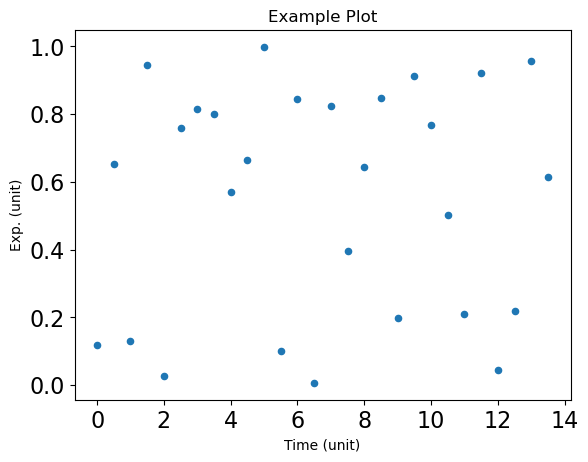

In [88]:
df.plot(x='Time', y='Exp', kind='scatter',
        xlabel='Time (unit)', ylabel='Exp. (unit)',
        title='Example Plot', fontsize=16)

array([<AxesSubplot:title={'center':'Example Plot: Exp'}, xlabel='X-Label', ylabel='Y-Label'>,
       <AxesSubplot:title={'center':'Example Plot: Theory'}, xlabel='X-Label', ylabel='Y-Label'>],
      dtype=object)

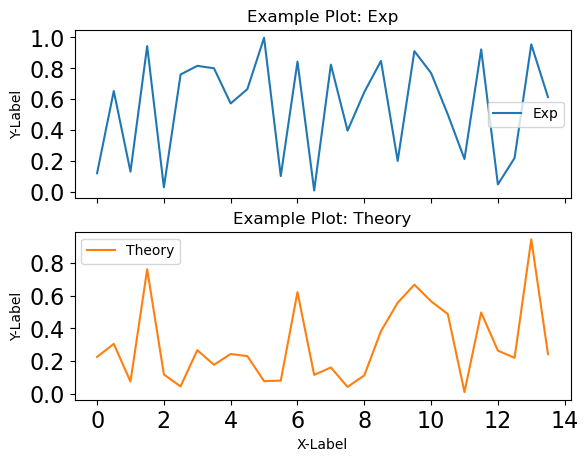

In [89]:
## The following is usable when `kind` = line, box, hist, kde, but not for scatter

df.plot(x='Time', y=['Exp', 'Theory'], kind='line',
        xlabel='X-Label', ylabel='Y-Label',
        title=['Example Plot: Exp', 'Example Plot: Theory'], fontsize=16, subplots=True)

An **alternative way** (also usable with older Pandas version) that gives you a bit **more control** over, for example
1. the fontsize of different elements, for example
    - axis label
    - title
1. legend location

This is similar to how matplotlib works.

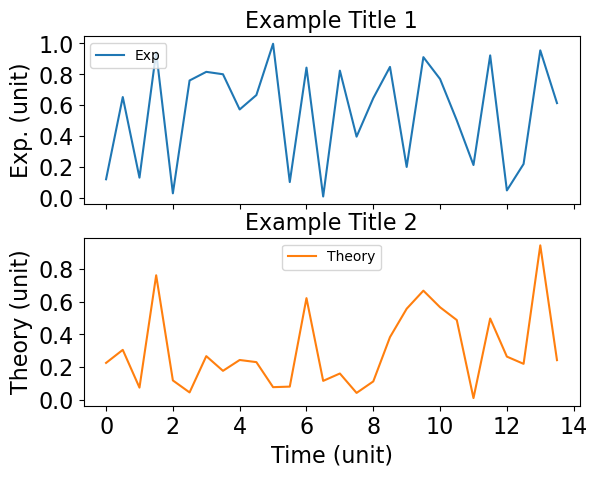

In [90]:
graphs = df.plot(x='Time', y=['Exp', 'Theory'], kind='line', fontsize=16, subplots=True)

graphs[0].set_title("Example Title 1", fontsize=16)
graphs[0].set_ylabel("Exp. (unit)", fontsize=16)
graphs[0].legend(loc='upper left')

graphs[1].set_title("Example Title 2", fontsize=16)
graphs[1].set_xlabel("Time (unit)", fontsize=16)
graphs[1].set_ylabel("Theory (unit)", fontsize=16)
graphs[1].legend(loc='upper center')

<div class="alert alert-block alert-warning">
<hr style="border:1.5px dashed gray"></hr>

## Moving averages (data smoothing)
- https://en.wikipedia.org/wiki/Moving_average

- rolling mean of data via pandas

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html?highlight=rolling#pandas.DataFrame.rolling

In [91]:
rectangles_data['area moving avg'] = rectangles_data['area'].rolling(window=2, win_type=None).mean()
rectangles_data

,length,height,area,area moving avg
Rect. 1,0.1,8.7,0.87,NaN
Rect. 2,9.4,6.2,58.28,29.575
Rect. 3,6.2,9.4,58.28,58.280
Rect. 4,3.8,5.6,21.28,39.780
Rect. 5,9.4,3.3,31.02,26.150


<div class="alert alert-block alert-warning">
<hr style="border:1.5px dashed gray"></hr>

## Pandas to Latex
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_latex.html

In [92]:
print(df.to_latex(index=False))

\begin{tabular}{rrr}
\toprule
 Time &    Exp &  Theory \\
\midrule
  0.0 & 0.1185 &  0.2255 \\
  0.5 & 0.6524 &  0.3052 \\
  1.0 & 0.1291 &  0.0744 \\
  1.5 & 0.9445 &  0.7611 \\
  2.0 & 0.0272 &  0.1183 \\
  2.5 & 0.7598 &  0.0450 \\
  3.0 & 0.8159 &  0.2669 \\
  3.5 & 0.8003 &  0.1770 \\
  4.0 & 0.5716 &  0.2433 \\
  4.5 & 0.6651 &  0.2302 \\
  5.0 & 0.9983 &  0.0772 \\
  5.5 & 0.1004 &  0.0805 \\
  6.0 & 0.8433 &  0.6214 \\
  6.5 & 0.0067 &  0.1156 \\
  7.0 & 0.8238 &  0.1607 \\
  7.5 & 0.3952 &  0.0420 \\
  8.0 & 0.6452 &  0.1123 \\
  8.5 & 0.8480 &  0.3830 \\
  9.0 & 0.1986 &  0.5566 \\
  9.5 & 0.9114 &  0.6670 \\
 10.0 & 0.7693 &  0.5655 \\
 10.5 & 0.5009 &  0.4875 \\
 11.0 & 0.2110 &  0.0104 \\
 11.5 & 0.9227 &  0.4968 \\
 12.0 & 0.0461 &  0.2639 \\
 12.5 & 0.2177 &  0.2197 \\
 13.0 & 0.9554 &  0.9440 \\
 13.5 & 0.6130 &  0.2423 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_27521/1842088038.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index=False))


<div class="alert alert-block alert-warning">
<hr style="border:1.5px dashed gray"></hr>

## Import Data from a European data csv file
(e.g. decimal usage: 10.135,11)

In [93]:
## CSV data file acan be found at
## https://github.com/karlkirschner/2020_Scientific_Programming/blob/master/data_eu.csv

## For Colabs

## In order to upload data

#from google.colab import files
#uploaded = files.upload()

In [94]:
!head data_eu.csv --lines=10

Time;Exp;Theory;Value
0,0;0,1185;0,226;10.135,11
0,5;0,6524;0,305;11.106,23
1,0;0,1291;0,074;12.347,45
1,5;0,9445;0,761;18.421,76
2,0;0,0272;0,118;13.551,78
2,5;0,7598;0,045;14.827,12
3,0;0,8159;0,267;14.305,56
3,5;0,8003;0,177;10.908,72
4,0;0,5716;0,243;11.106,23


In [95]:
df = pd.read_csv('data_eu.csv', decimal=',', thousands='.', sep=';')
df.columns
df['Value']

0     10135.11
1     11106.23
2     12347.45
3     18421.76
4     13551.78
5     14827.12
6     14305.56
7     10908.72
8     11106.23
9     12347.45
10    18421.76
11    13551.78
12    14827.12
13    14305.56
14    10908.72
15    11106.23
16    12347.45
17    18421.76
18    13551.78
19    14827.12
20    14305.56
21    10908.72
22    11106.23
23    12347.45
24    18421.76
25    13551.78
26    14827.12
27    14305.56
Name: Value, dtype: float64